In [72]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd

file_path = '/content/drive/MyDrive/Data/sasa.csv'
df = pd.read_csv(file_path)

In [75]:
df.head()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,29.12.2023,"36,440","36,700","36,940","36,400","38,86M","-0,55%"
1,28.12.2023,"36,640","36,540","37,040","36,200","44,73M","0,38%"
2,27.12.2023,"36,500","38,100","38,280","36,500","42,14M","-4,25%"
3,26.12.2023,"38,120","37,600","38,980","37,600","39,50M","1,60%"
4,25.12.2023,"37,520","38,580","38,580","36,280","29,59M","-2,80%"


In [76]:
df.rename(columns={'Tarih': 'Date', 'Şimdi': 'Close', 'Açılış': 'Open', 'Yüksek': 'High', 'Düşük': 'Low', 'Hac.': 'Volume', 'Fark %' : 'Change %'}, inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1250 non-null   object
 1   Close     1250 non-null   object
 2   Open      1250 non-null   object
 3   High      1250 non-null   object
 4   Low       1250 non-null   object
 5   Volume    1250 non-null   object
 6   Change %  1250 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


In [78]:
df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-78-b9c6864122be>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [79]:
df.head()

,Date,Close,Open,High,Low,Volume,Change %
0,2023-12-29,"36,440","36,700","36,940","36,400","38,86M","-0,55%"
1,2023-12-28,"36,640","36,540","37,040","36,200","44,73M","0,38%"
2,2023-12-27,"36,500","38,100","38,280","36,500","42,14M","-4,25%"
3,2023-12-26,"38,120","37,600","38,980","37,600","39,50M","1,60%"
4,2023-12-25,"37,520","38,580","38,580","36,280","29,59M","-2,80%"


In [80]:
df['Close'] = df['Close'].apply(lambda x: x.replace(',', '.'))

In [81]:
df['Open'] = df['Open'].apply(lambda x: x.replace(',', '.'))

In [82]:
df['High'] = df['High'].apply(lambda x: x.replace(',', '.'))

In [83]:
df['Low'] = df['Low'].apply(lambda x: x.replace(',', '.'))

In [84]:
df['Volume'] = df['Volume'].apply(lambda x: x.replace(',', '.'))

In [85]:
df['Volume'] = df['Volume'].apply(lambda x: x.replace('M', ''))

In [86]:
df['Close'] = df['Close'].astype(float)

In [87]:
df['Open'] = df['Open'].astype(float)

In [88]:
df['High'] = df['High'].astype(float)

In [89]:
df['Low'] = df['Low'].astype(float)

In [90]:
df['Volume'] = df['Volume'].astype(float)

In [91]:
df['Volume'] = df['Volume'].multiply(1000000)

In [92]:
df.drop(columns=['Change %'], inplace=True)

In [93]:
df.head()

,Date,Close,Open,High,Low,Volume
0,2023-12-29,36.44,36.70,36.94,36.40,38860000.0
1,2023-12-28,36.64,36.54,37.04,36.20,44730000.0
2,2023-12-27,36.50,38.10,38.28,36.50,42140000.0
3,2023-12-26,38.12,37.60,38.98,37.60,39500000.0
4,2023-12-25,37.52,38.58,38.58,36.28,29590000.0


In [94]:
#Importing all the required library files
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [95]:
stk_data=df
stk_data.head()

,Date,Close,Open,High,Low,Volume
0,2023-12-29,36.44,36.70,36.94,36.40,38860000.0
1,2023-12-28,36.64,36.54,37.04,36.20,44730000.0
2,2023-12-27,36.50,38.10,38.28,36.50,42140000.0
3,2023-12-26,38.12,37.60,38.98,37.60,39500000.0
4,2023-12-25,37.52,38.58,38.58,36.28,29590000.0


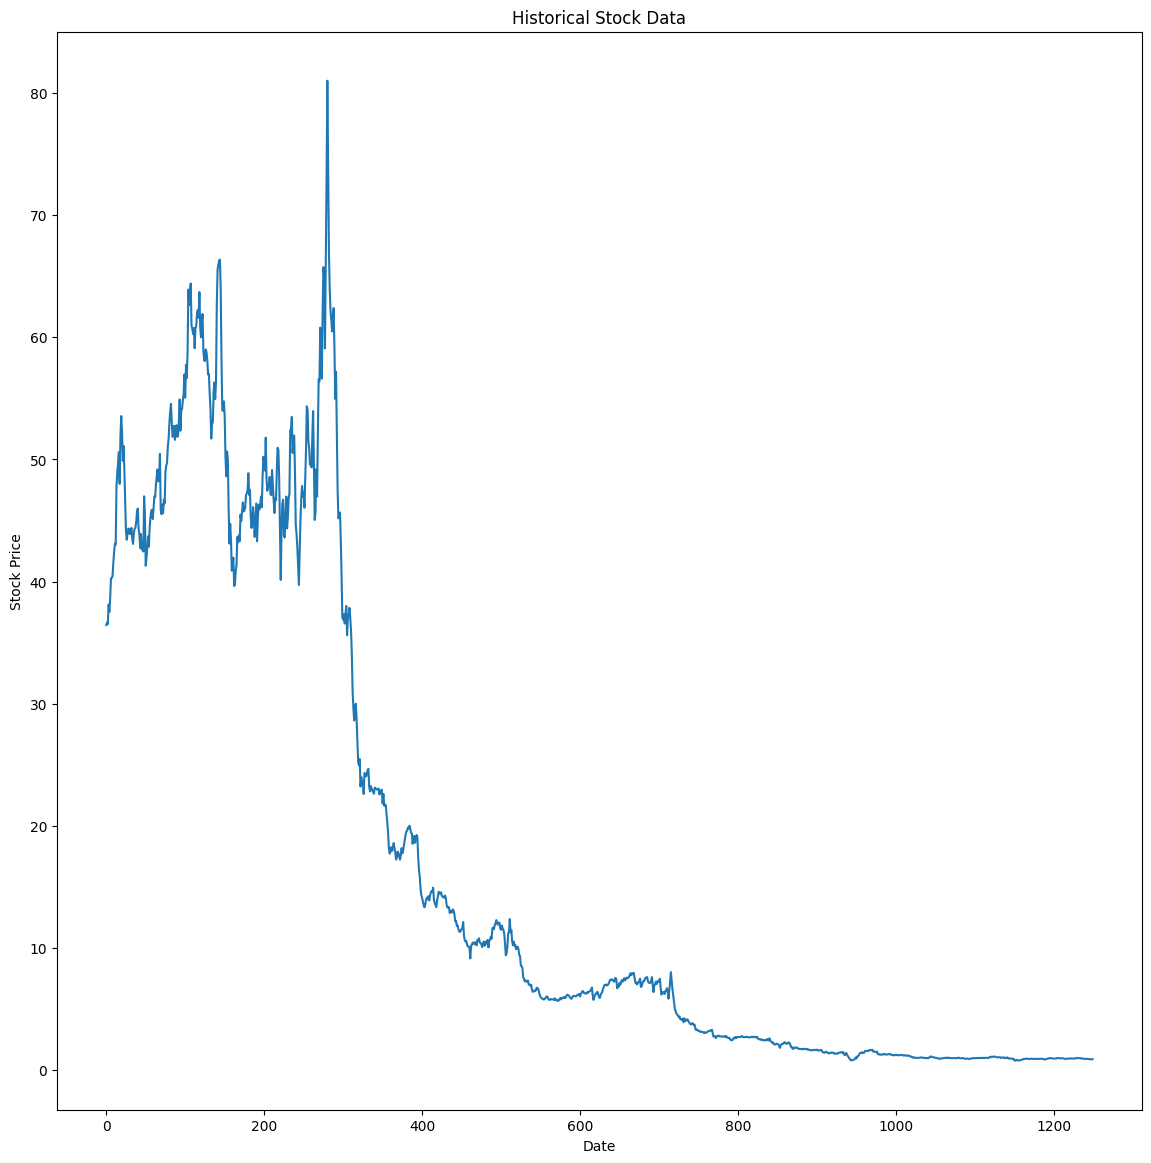

In [96]:
#Visualising the above dataset
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [97]:
#Dropping of unneccessary columns in dataframe
stk_data['Date'] = stk_data.index
stk_data=stk_data.drop(['Volume'],axis=1)

#Determining the number of NAN values in dataframe
stk_data.isnull().sum()

Date     0
Close    0
Open     0
High     0
Low      0
dtype: int64

In [98]:
#Preprocessing of data for LSTM model
train_set=stk_data.iloc[:,1:2].values
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(train_set)
X_train=[]
y_train=[]
for i in range(60,1248):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [99]:
#Defining the LSTM model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [100]:
#Training the LSTM model for the given dataset
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=20,batch_size=24)

Epoch 1/20
50/50 [==============================] - 7s 16ms/step - loss: 0.0138
Epoch 2/20
50/50 [==============================] - 1s 16ms/step - loss: 0.0037
Epoch 3/20
50/50 [==============================] - 1s 20ms/step - loss: 0.0040
Epoch 4/20
50/50 [==============================] - 1s 20ms/step - loss: 0.0033
Epoch 5/20
50/50 [==============================] - 1s 19ms/step - loss: 0.0035
Epoch 6/20
50/50 [==============================] - 1s 19ms/step - loss: 0.0028
Epoch 7/20
50/50 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 8/20
50/50 [==============================] - 1s 14ms/step - loss: 0.0024
Epoch 9/20
50/50 [==============================] - 1s 14ms/step - loss: 0.0026
Epoch 10/20
50/50 [==============================] - 1s 14ms/step - loss: 0.0027
Epoch 11/20
50/50 [==============================] - 1s 15ms/step - loss: 0.0022
Epoch 12/20
50/50 [==============================] - 1s 14ms/step - loss: 0.0022
Epoch 13/20
50/50 [==================

In [101]:
file_path2 = '/content/drive/MyDrive/Data/sasa_test.csv'
df = pd.read_csv(file_path2)

In [102]:
df.head()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,31.12.2018,"0,926","0,916","0,935","0,908","20,22M","1,31%"
1,28.12.2018,"0,914","0,922","0,923","0,911","16,93M","-0,65%"
2,27.12.2018,"0,920","0,944","0,944","0,918","18,08M","-1,29%"
3,26.12.2018,"0,932","0,929","0,951","0,923","35,31M","1,53%"
4,25.12.2018,"0,918","0,923","0,923","0,909","14,61M","-1,29%"


In [103]:
df.rename(columns={'Tarih': 'Date', 'Şimdi': 'Close', 'Açılış': 'Open', 'Yüksek': 'High', 'Düşük': 'Low', 'Hac.': 'Volume', 'Fark %' : 'Change %'}, inplace=True)

In [104]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-104-b9c6864122be>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [105]:
df['Close'] = df['Close'].apply(lambda x: x.replace(',', '.'))

df['Open'] = df['Open'].apply(lambda x: x.replace(',', '.'))

df['High'] = df['High'].apply(lambda x: x.replace(',', '.'))

df['Low'] = df['Low'].apply(lambda x: x.replace(',', '.'))

df['Volume'] = df['Volume'].apply(lambda x: x.replace(',', '.'))

df['Volume'] = df['Volume'].apply(lambda x: x.replace('M', ''))

df['Close'] = df['Close'].astype(float)

df['Open'] = df['Open'].astype(float)

df['High'] = df['High'].astype(float)

df['Low'] = df['Low'].astype(float)

df['Volume'] = df['Volume'].astype(float)

df['Volume'] = df['Volume'].multiply(1000000)

df.drop(columns=['Change %'], inplace=True)

In [106]:
df.head()

,Date,Close,Open,High,Low,Volume
0,2018-12-31,0.926,0.916,0.935,0.908,20220000.0
1,2018-12-28,0.914,0.922,0.923,0.911,16930000.0
2,2018-12-27,0.920,0.944,0.944,0.918,18080000.0
3,2018-12-26,0.932,0.929,0.951,0.923,35310000.0
4,2018-12-25,0.918,0.923,0.923,0.909,14610000.0


In [107]:
testdataframe=df

In [108]:
#Dropping unnecesaary column from dataframe
testdataframe=testdataframe.drop(['Volume'],axis=1)

#Determining nan values in testdataframe
testdataframe.isnull().sum()

Date     0
Close    0
Open     0
High     0
Low      0
dtype: int64

In [109]:
testdataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   Close   251 non-null    float64       
 2   Open    251 non-null    float64       
 3   High    251 non-null    float64       
 4   Low     251 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.9 KB


In [110]:
#Determining X_test and y_test using testdataframe
real_stock_price = testdataframe.iloc[:, 1:2].values[:175]
dataset_total = pd.concat((stk_data['Open'], testdataframe['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdataframe) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [111]:
#Predicting the stock prices using the above trained model
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


6/6 [==============================] - 1s 8ms/step


In [112]:
#Determining metrics for the given model

#Mean Squared Error for given LSTM model
mse=mean_squared_error(real_stock_price,predicted_stock_price)
print("Mean Squared Error for given LSTM model:",mse)

#Mean Absolute Error for given LSTM model
mae=mean_absolute_error(real_stock_price,predicted_stock_price)
print("Mean Absolute Error for given LSTM model:",mae)

#R-squared Error for given LSTM model
r2=r2_score(real_stock_price,predicted_stock_price)
print("R-Squared Error for given LSTM model:",r2)

#Root Mean Squared Error for given LSTM model
rmse=mse**0.5
print("Root Mean Squared Error for given LSTM model:",rmse)


Mean Squared Error for given LSTM model: 0.007864335393110893
Mean Absolute Error for given LSTM model: 0.07158967399869648
R-Squared Error for given LSTM model: -0.12051792017602558
Root Mean Squared Error for given LSTM model: 0.0886810881367098


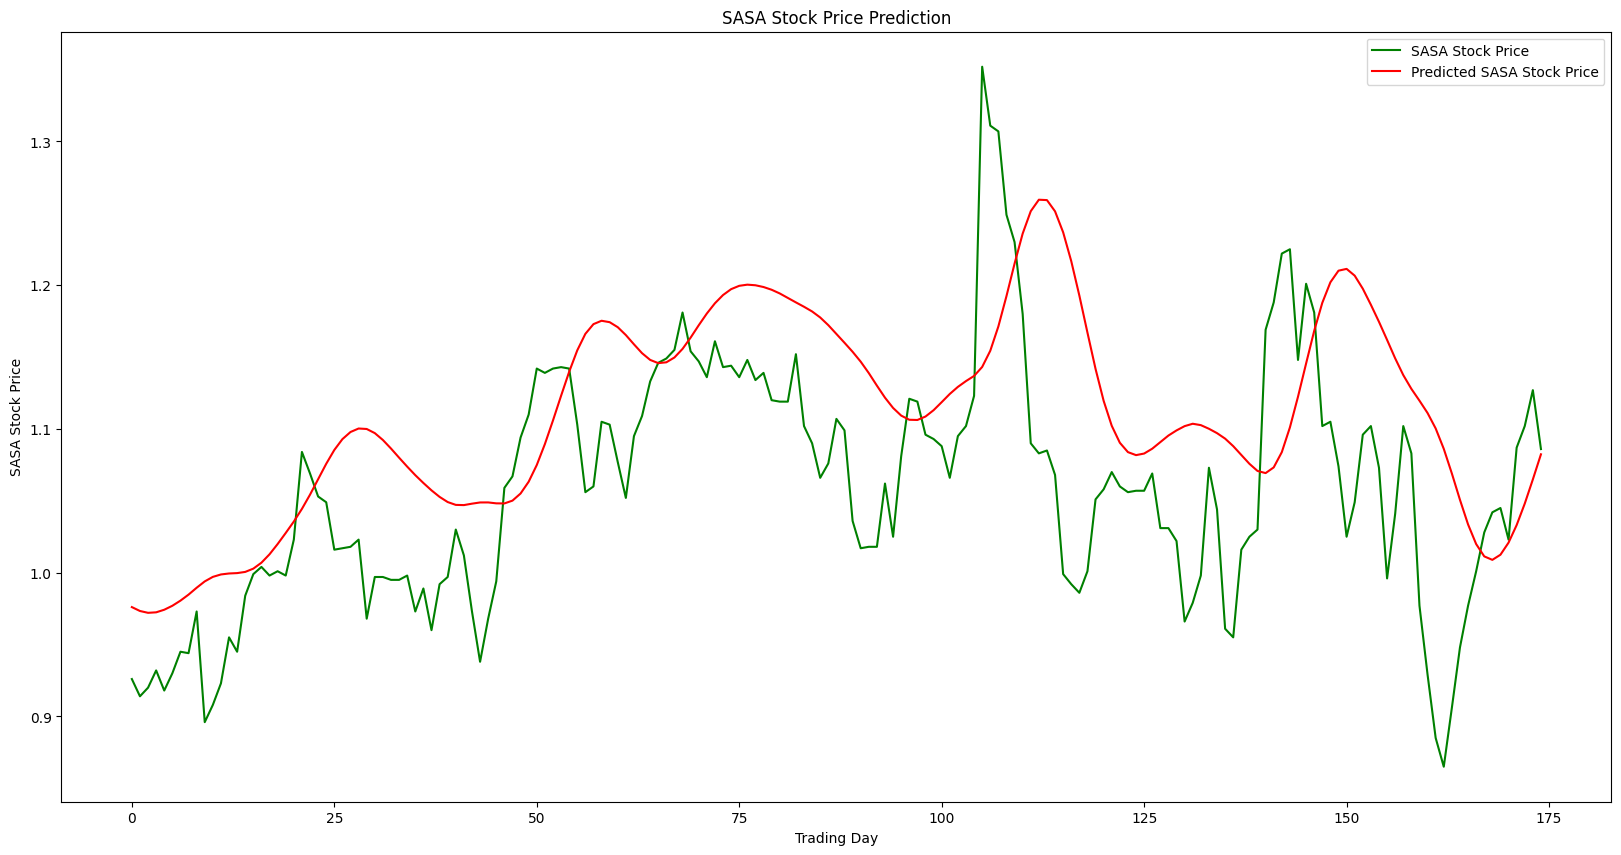

In [113]:
#Plotting of Real stock price along with predicted stock price
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SASA Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SASA Stock Price')
plt.title('SASA Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SASA Stock Price')
plt.legend()
plt.show()